In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv(r"C:\Users\Thund\NSS_Data_Analytics\Projects\Python\gdp-and-internet-usage-Daniel-Hoover\Data\gdp_percapita.csv")

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


There are 7662 rows. The data types are floats, integers, and objects

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'

In [5]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [6]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'})
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [7]:
country = gdp_df.groupby('Country')
years = country['Year'].count()
not_all = years[years != 33]
print(not_all)
print(not_all.shape)

Country
Afghanistan                  20
Aruba                        32
Bhutan                       32
Bosnia and Herzegovina       29
Cambodia                     30
Cayman Islands               16
Croatia                      28
CuraÃ§ao                     22
Djibouti                     10
Estonia                      28
Hungary                      32
Iceland                      28
Israel                       28
Kosovo                       15
Kuwait                       31
Latvia                       28
Lebanon                      32
Liberia                      23
Libya                        24
Lithuania                    28
Maldives                     28
Moldova                      28
Montenegro                   26
Nauru                        19
Other small states           23
Palau                        22
Qatar                        23
San Marino                   25
Serbia                       28
Sint Maarten (Dutch part)    14
Slovak Republic              31


There are 40 countries with incomplete data

In [8]:
gdp_years = gdp_df['Year'].value_counts()
sort_years = gdp_years.sort_values()
sort_years.to_frame()

,count
Year,
1990,207
1991,208
1992,210
1993,211
1994,213
1995,223
1996,223
1997,226
1998,226


The number of observations per year increased steadily before leveling out in 2013 and began a slight decline with 2022.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [9]:
gdp2020 = gdp_df[gdp_df['Year'] == 2020]
#checking that it is correctly pulled
print(gdp2020)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
22    Africa Eastern and Southern  2020     3455.023119
55     Africa Western and Central  2020     3957.933804
88                        Albania  2020    13278.369769
121                       Algeria  2020    10844.770764
...                           ...   ...             ...
7503                     Viet Nam  2020    10450.622382
7536           West Bank and Gaza  2020     5402.538773
7565                        World  2020    16204.169107
7598                       Zambia  2020     3183.650773
7631                     Zimbabwe  2020     1990.319419

[242 rows x 3 columns]


Text(0, 0.5, 'Countries')

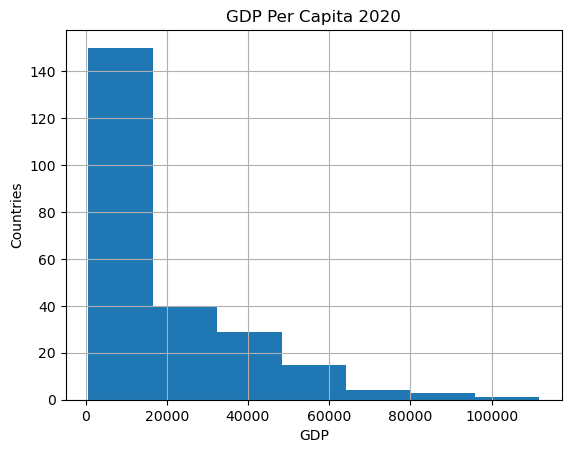

In [15]:
gdp2020['GDP_Per_Capita'].hist(bins=7)
plt.title('GDP Per Capita 2020')
plt.xlabel('GDP')
plt.ylabel('Countries')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

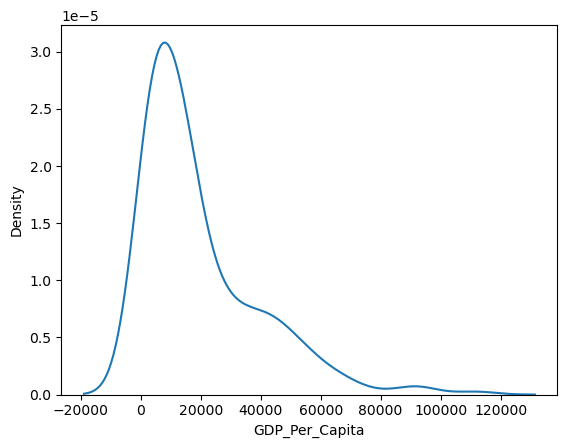

In [16]:
sns.kdeplot(gdp2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita'>

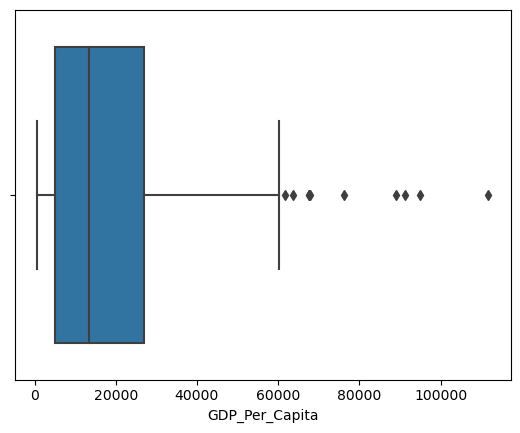

In [23]:
sns.boxplot(x=gdp2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita'>

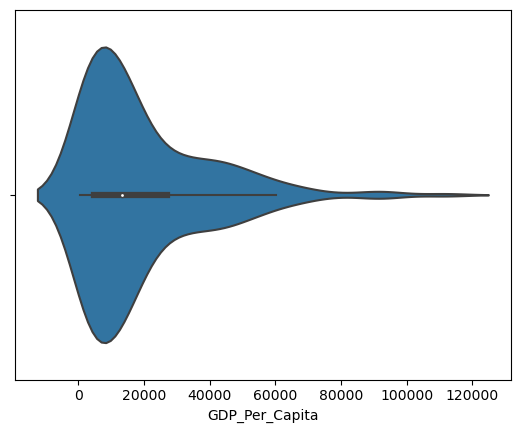

In [28]:
sns.violinplot(x=gdp2020['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [29]:
median2020=gdp2020['GDP_Per_Capita'].median()
print(median2020)

13357.997573370474


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [39]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
print(gdp_decades.head())

                        Country  Year  GDP_Per_Capita
1                   Afghanistan  2020     1968.341002
11                  Afghanistan  2010     2026.163818
22  Africa Eastern and Southern  2020     3455.023119
32  Africa Eastern and Southern  2010     3513.315920
42  Africa Eastern and Southern  2000     2897.140841


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

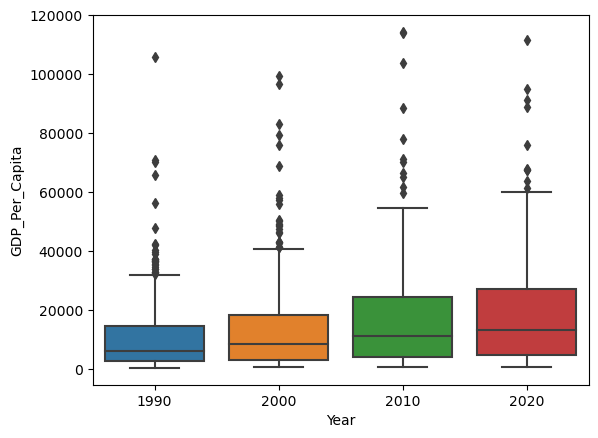

In [49]:
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

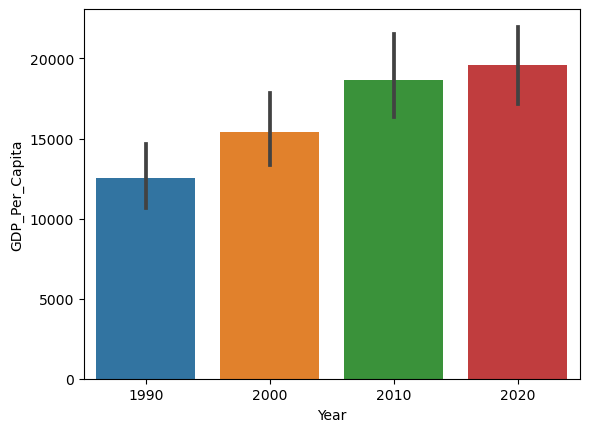

In [50]:
sns.barplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

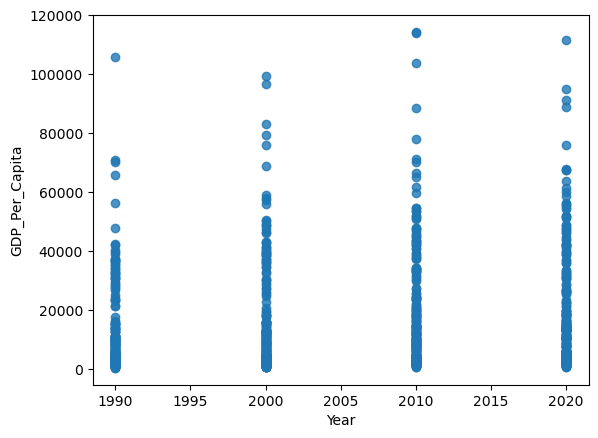

In [60]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], fit_reg=False)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

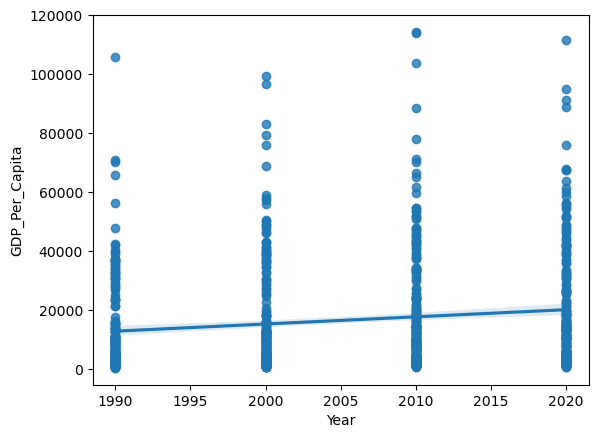

In [59]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

In [ ]:
tenk = gdp_df[gdp_df['GDP_Per_Capita']>100000]

In [11]:
country_year = gdp_df.groupby('Country')['Year'].agg([min, max])
print(country_year)

                              min   max
Country                                
Afghanistan                  2002  2021
Africa Eastern and Southern  1990  2022
Africa Western and Central   1990  2022
Albania                      1990  2022
Algeria                      1990  2022
...                           ...   ...
Viet Nam                     1990  2022
West Bank and Gaza           1994  2022
World                        1990  2022
Zambia                       1990  2022
Zimbabwe                     1990  2022

[242 rows x 2 columns]


In [12]:
gdp_df.pivot_table(values = 'Year', index = 'Country')

,Year
Country,
Afghanistan,2011.5
Africa Eastern and Southern,2006.0
Africa Western and Central,2006.0
Albania,2006.0
Algeria,2006.0
...,...
Viet Nam,2006.0
West Bank and Gaza,2008.0
World,2006.0
